# The main code for the NLP Model For Human Stress Prediction is written in this document 

## This document contains the following: 
- Importing data from the cleaned dataset from the "text_preprocessing.ipynb" file. The file is from /Data/ml_nlp.csv 
- The imported data is a cleaned version of the orginal dataset of Stress.csv 
- There are two features we are interested in the "text" feature, which is the text from various sub-reddits and the "label" feature which is the results feature 
- This document will begin by splitting the data into a training set and a test set 
- Perfrom vectorization via TFIDF, to convert the raw data into a numerical form, thus we can apply the ML analysis on. Also, TFIDF is chosen, because it perfroms better during Sentiment Analysis
- Once vectrization is applied we can create the ML model for the NLP problem. Three models are created: Logstic Regression, and Naive Bayes
- The optimimum hypeparamters from the training sets for each model will be selected via an extensive GridSearchCV or RandomizedSearchCV(if running the algorithm takes too long in terms of computational time). Then, the test set for each algorithm will display the algorithms efficiency
- The main metrics we will be looking at is Accuracy (for an overview of how each algorithm is performing) and recall, because higher recall produces less false negatives and that is a value we must decrease, because, we do not want to produce an algorithm that assumes a person is not suffering from a psychological issues while they are 

# ML Analysis Prep 

## Importing the data

In [29]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import re
df = pd.read_csv("Data\\ml_nlp.csv")
print(df.head)


<bound method NDFrame.head of       Unnamed: 0                                 text_preprocessing  \
0              0  He said felt way suggeted I go rest TRIGGER AH...   
1              1  Hey rassistance Not sure right place post go I...   
2              2  My mom hit newspaper shocked would know I dont...   
3              3  met new boyfriend amazing kind sweet good stud...   
4              4  October Domestic Violence Awareness Month I do...   
...          ...                                                ...   
2832        2833  Her week ago Precious I ignored Her Jan 1 Happ...   
2833        2834  I dont ability cope anymore Im trying lot thin...   
2834        2835  In case first time youre reading post We looki...   
2835        2836  Do find normal They good relationship Main pro...   
2836        2837  I talking mom morning said sister Her trauma w...   

                        label  
0        psychological issues  
1     No psychological issues  
2        psychologica

In [30]:
y_label_main =  df['label']
X_features_main =  df['text_preprocessing']

In [31]:
y_label_main

0          psychological issues
1       No psychological issues
2          psychological issues
3          psychological issues
4          psychological issues
                 ...           
2832    No psychological issues
2833       psychological issues
2834    No psychological issues
2835    No psychological issues
2836       psychological issues
Name: label, Length: 2837, dtype: object

In [32]:
X_features_main

0       He said felt way suggeted I go rest TRIGGER AH...
1       Hey rassistance Not sure right place post go I...
2       My mom hit newspaper shocked would know I dont...
3       met new boyfriend amazing kind sweet good stud...
4       October Domestic Violence Awareness Month I do...
                              ...                        
2832    Her week ago Precious I ignored Her Jan 1 Happ...
2833    I dont ability cope anymore Im trying lot thin...
2834    In case first time youre reading post We looki...
2835    Do find normal They good relationship Main pro...
2836    I talking mom morning said sister Her trauma w...
Name: text_preprocessing, Length: 2837, dtype: object

## Splitting the data

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_features_main, y_label_main, test_size=0.20 , random_state=101) 
print (X_train.shape)
print (X_test.shape)

(2269,)
(568,)


## Applying TfidfVectorizer

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
TfidfVectorizer = TfidfVectorizer(stop_words='english') 

tfidf_fit = TfidfVectorizer.fit(X_train) #Fit only on the training data
tfidf_X_train = tfidf_fit.transform(X_train) #Transform on the training & test data
tfidf_X_test = tfidf_fit.transform(X_test) #Transform on the training & test data

In [35]:
print(tfidf_X_test)

  (0, 9666)	0.09372347958687603
  (0, 8891)	0.18642539996253735
  (0, 8876)	0.1803367501268533
  (0, 7422)	0.2521939862663904
  (0, 7090)	0.2521939862663904
  (0, 6282)	0.1981258537672627
  (0, 6144)	0.16131790168473611
  (0, 5792)	0.13814930508482393
  (0, 5650)	0.16242517843412255
  (0, 5506)	0.22763580088746313
  (0, 4810)	0.09487443836147956
  (0, 4461)	0.07048377089396327
  (0, 4249)	0.1706134602966799
  (0, 4195)	0.16535494363259795
  (0, 4150)	0.1576941648976753
  (0, 3694)	0.10517859676403339
  (0, 3265)	0.28933137227747524
  (0, 3213)	0.28465814147824636
  (0, 2483)	0.15920205085590444
  (0, 2354)	0.16131790168473611
  (0, 2295)	0.18642539996253735
  (0, 2036)	0.1720597824301063
  (0, 1905)	0.1618672145836101
  (0, 1766)	0.16474928833288763
  (0, 1413)	0.2242589638609565
  :	:
  (567, 9173)	0.10218954953759622
  (567, 8695)	0.08348643955324016
  (567, 8176)	0.11821578395801725
  (567, 6970)	0.18243901754632513
  (567, 6493)	0.1005767502869298
  (567, 6378)	0.1755593523708214
 

----------------

# ML Models Analysis 

- Three models are created: Logstic Regression, SVM-SVC, and Naive Bayes
- The optimimum hypeparamters from the training sets for each model will be selected via an extensive GridSearchCV. Then, the test set for each algorithm will display the algorithms efficiency
- The main metrics we will be looking at is Accuracy for an overview of how each algorithm is performing and recall, because the best algorithm will have the lowest false negatives. We do not want to produce an algorithm that assumes a person is not suffering from a psychological issues while they are 

## Logistic Regression

### Logistic Regression - Accuracy As A Metric

In [9]:
#Finding the optimum hyperparamters when accuracy is the metric to Optimize

from sklearn.linear_model import LogisticRegression
ML_logistic_model = LogisticRegression()

from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')#  Will not show any of the warnings
parameters = {'penalty' : ['l1','l2','elasticnet'],'C': np.logspace(-3,5,7),'l1_ratio': np.linspace(0,1,5),'solver'  : ['liblinear', 'saga','newton-cholesky']} #Theses paramters we tune

ML_logistic_model_grid_model = RandomizedSearchCV(ML_logistic_model, param_distributions = parameters, scoring='accuracy', cv=10, n_jobs=-1)                     
ML_logistic_model_grid_model.fit(tfidf_X_train,y_train ) #fitting the model to the X and y trained data

print("Tuned Hyperparameters :", ML_logistic_model_grid_model.best_params_) 
print("accuracy :",ML_logistic_model_grid_model.best_score_) 

Tuned Hyperparameters : {'solver': 'saga', 'penalty': 'l2', 'l1_ratio': 0.75, 'C': 0.46415888336127775}
accuracy : 0.7368932985068809


In [36]:
#Model Building from the RandomizedSearchCV's results 

from sklearn.linear_model import LogisticRegression
ML_logistic_model = LogisticRegression(penalty ='l2',C=0.46415888336127775 , solver='saga',l1_ratio=0.75) #Results from GridSearchCV
ML_logistic_model.fit(tfidf_X_train,y_train ) #fitting the model to the X and y trained data
y_predicted_logistic = ML_logistic_model.predict(tfidf_X_test) #view the predicted results from the fitted model by predicting the X Test (X_validation)


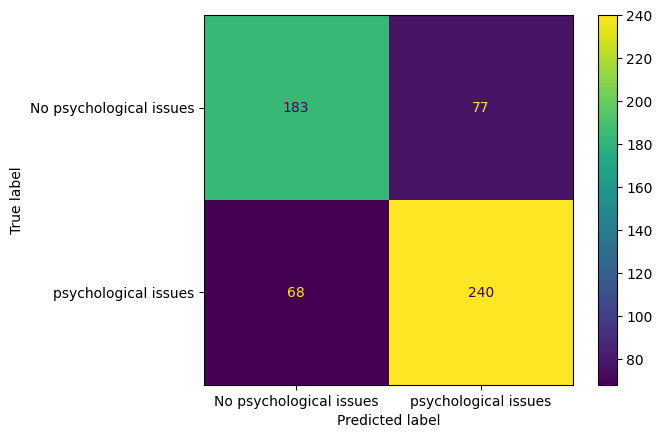

                         precision    recall  f1-score   support

No psychological issues       0.73      0.70      0.72       260
   psychological issues       0.76      0.78      0.77       308

               accuracy                           0.74       568
              macro avg       0.74      0.74      0.74       568
           weighted avg       0.74      0.74      0.74       568



In [37]:
#Model's Results 


from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix,classification_report

cm = confusion_matrix(y_test, y_predicted_logistic, labels=ML_logistic_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ML_logistic_model.classes_)
disp.plot()
plt.show() 

##View the classification report 
ML_logistic_model_classification_report  = classification_report(y_test,y_predicted_logistic)
print(ML_logistic_model_classification_report)

In [21]:
###########################################################################################################################################################################################################################################

### Logistic Regression - Recall As A Metric

In [6]:
#Finding the optimum hyperparamters when recall is the metric to Optimize

from sklearn.linear_model import LogisticRegression
ML_logistic_model = LogisticRegression()

from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')#  Will not show any of the warnings
parameters = {'penalty' : ['l1','l2','elasticnet'],'C': np.logspace(-3,5,7),'l1_ratio': np.linspace(0,1,5),'solver'  : ['liblinear', 'saga','newton-cholesky']} #Theses paramters we tune

ML_logistic_model_grid_model = RandomizedSearchCV(ML_logistic_model, param_distributions = parameters, scoring='recall', cv=10, n_jobs=-1)                     
ML_logistic_model_grid_model.fit(tfidf_X_train,y_train ) #fitting the model to the X and y trained data

print("Tuned Hyperparameters :", ML_logistic_model_grid_model.best_params_) 
print("recall :",ML_logistic_model_grid_model.best_score_) 

Tuned Hyperparameters : {'solver': 'saga', 'penalty': 'l2', 'l1_ratio': 1.0, 'C': 0.021544346900318832}
recall : 0.9991525423728813


In [40]:
#Model Building from the RandomizedSearchCV's results 

from sklearn.linear_model import LogisticRegression
ML_logistic_model = LogisticRegression(penalty ='l2',C=0.021544346900318832 , solver='saga',l1_ratio=1.0) #Results from GridSearchCV
ML_logistic_model.fit(tfidf_X_train,y_train ) #fitting the model to the X and y trained data
y_predicted_logistic = ML_logistic_model.predict(tfidf_X_test) #view the predicted results from the fitted model by predicting the X Test (X_validation)

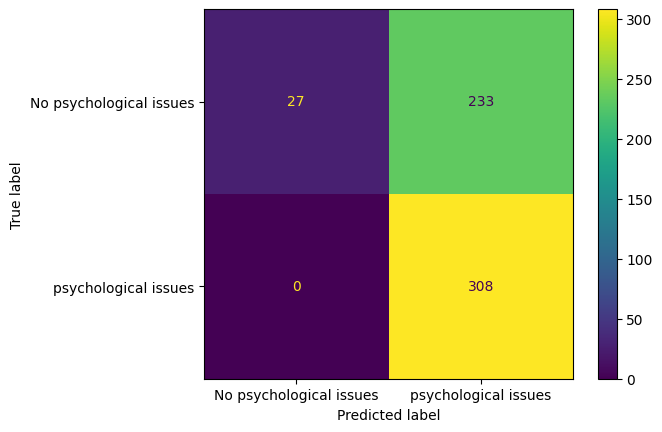

                         precision    recall  f1-score   support

No psychological issues       1.00      0.10      0.19       260
   psychological issues       0.57      1.00      0.73       308

               accuracy                           0.59       568
              macro avg       0.78      0.55      0.46       568
           weighted avg       0.77      0.59      0.48       568



In [41]:
#Model's Results 

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix,classification_report

cm = confusion_matrix(y_test, y_predicted_logistic, labels=ML_logistic_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ML_logistic_model.classes_)
disp.plot()
plt.show() 

##View the classification report 
ML_logistic_model_classification_report  = classification_report(y_test,y_predicted_logistic)
print(ML_logistic_model_classification_report)

--------------------------------------------------------------------------------------------

## Multinomial Naive Bayes

### Naive Bayes - Accuracy As A Metric 

In [55]:
#Finding the optimum hyperparamters when accuracy is the metric to Optimize
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()


from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')#  Will not show any of the warnings
parameters = {'alpha' : [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000], 'force_alpha': [True, False], 'fit_prior':[True, False]} #Theses paramters we tune

ML_MultinomialNB_model_grid_model = RandomizedSearchCV(nb_model, param_distributions = parameters, scoring='accuracy', cv=10, n_jobs=-1)                     
ML_MultinomialNB_model_grid_model.fit(tfidf_X_train,y_train ) #fitting the model to the X and y trained data

print("Tuned Hyperparameters :", ML_MultinomialNB_model_grid_model.best_params_) 
print("accuracy :",ML_MultinomialNB_model_grid_model.best_score_) 

Tuned Hyperparameters : {'force_alpha': True, 'fit_prior': False, 'alpha': 0.1}
accuracy : 0.7148532220966043


In [102]:
#Model Building from the RandomizedSearchCV's results 

from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB(force_alpha = True, fit_prior = False , alpha = 0.1 )
nb_model.fit(tfidf_X_train,y_train ) #fitting the model to the X and y trained data
y_predicted_NVM = nb_model.predict(tfidf_X_test) #view the predicted results from the fitted model by predicting the X Test (X_validation)

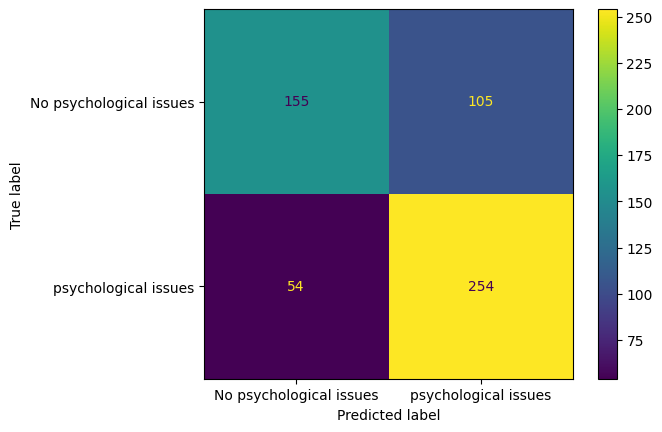

                         precision    recall  f1-score   support

No psychological issues       0.74      0.60      0.66       260
   psychological issues       0.71      0.82      0.76       308

               accuracy                           0.72       568
              macro avg       0.72      0.71      0.71       568
           weighted avg       0.72      0.72      0.72       568



In [103]:
#Model's Results 

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix,classification_report

cm = confusion_matrix(y_test, y_predicted_NVM, labels=nb_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb_model.classes_)
disp.plot()
plt.show() 

##View the classification report 
ML_NBM_model_classification_report  = classification_report(y_test,y_predicted_NVM)
print(ML_NBM_model_classification_report)

In [ ]:
###########################################################################################################################################################################################################################################

### Naive Bayes - Recall As A Metric 

In [101]:
#Finding the optimum hyperparamters when accuracy is the metric to Optimize
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()


from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')#  Will not show any of the warnings
parameters = {'alpha' : [0, 0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000], 'force_alpha': [True, False], 'fit_prior':[True, False]} #Theses paramters we tune

ML_MultinomialNB_model_grid_model = RandomizedSearchCV(nb_model, param_distributions = parameters, scoring='recall', cv=10, n_jobs=-1)                     
ML_MultinomialNB_model_grid_model.fit(tfidf_X_train,y_train ) #fitting the model to the X and y trained data

print("Tuned Hyperparameters :", ML_MultinomialNB_model_grid_model.best_params_) 
print("recall :",ML_MultinomialNB_model_grid_model.best_score_) 

Tuned Hyperparameters : {'force_alpha': False, 'fit_prior': True, 'alpha': 0.1}
recall : nan


- Even when Using RandomizedSearchCV the model seemed not to be able to converge when "recall" is the metric of choice this could be do to:
    - Data not being good to be used in this model 
    - There is not enough data to be used
- To solve the above issue a trial and error method will be used in which we will use various alpha paramters to hopefully decrease the False Negatives which means increasing the recall


In [179]:
#Model Building from the RandomizedSearchCV's results 

from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB(force_alpha = True, fit_prior = False , alpha = 1 )
nb_model.fit(tfidf_X_train,y_train ) #fitting the model to the X and y trained data
y_predicted_NVM = nb_model.predict(tfidf_X_test) #view the predicted results from the fitted model by predicting the X Test (X_validation)

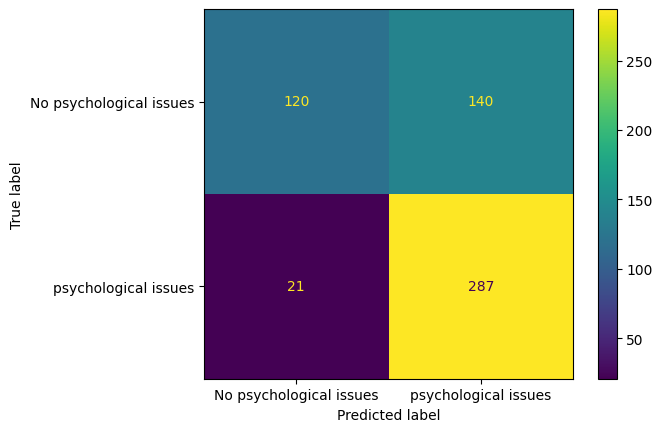

                         precision    recall  f1-score   support

No psychological issues       0.85      0.46      0.60       260
   psychological issues       0.67      0.93      0.78       308

               accuracy                           0.72       568
              macro avg       0.76      0.70      0.69       568
           weighted avg       0.75      0.72      0.70       568



In [180]:
#Model's Results 

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix,classification_report

cm = confusion_matrix(y_test, y_predicted_NVM, labels=nb_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb_model.classes_)
disp.plot()
plt.show() 

##View the classification report 
ML_NBM_model_classification_report  = classification_report(y_test,y_predicted_NVM)
print(ML_NBM_model_classification_report)

- Alpha the smoothing paramter is used to handle the problem when the probabilities reaches 0. 
- Increasing the smoothing parameter decreased the False Negatives. However, increasing alpha means that the overall distrubtion gets closer to being a uniform distrubtion (i.e., text data have the same probability of falling into the positive class as that of the negative class). Therefore, it is commonly recommended that we do not increase alpha beyond the value of 1 too much to avoid the data forming a uniform distrubtion 
- An alpha of 1 produced a false negative of 21 and false postive of 140
- An alpha of 2 produced a false negative of 14 and false postive of 151
- An alpha of 3 produced a false negative of 10 and false postive of 164
- An alpha of 4 produced a false negative of 9 and false postive of 173
- An alpha of 5 produced a false negative of 6  and false postive of 176
- The selected alpha value was 1, because even though false postive  is not the model's main concern it is still a number we wish to keep as low as possible

--------------------------------------------------------------------------------------------

## Bernoulli Naive Bayes

### Naive Bayes - Accuracy As A Metric 

In [194]:
#Finding the optimum hyperparamters when accuracy is the metric to Optimize
from sklearn.naive_bayes import BernoulliNB
nb_model = BernoulliNB()


from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')#  Will not show any of the warnings
parameters = {'alpha' : [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000], 'force_alpha': [True, False], 'fit_prior':[True, False]} #Theses paramters we tune

ML_BernoulliNBNB_model_grid_model = RandomizedSearchCV(nb_model, param_distributions = parameters, scoring='accuracy', cv=10, n_jobs=-1)                     
ML_BernoulliNBNB_model_grid_model.fit(tfidf_X_train,y_train ) #fitting the model to the X and y trained data

print("Tuned Hyperparameters :", ML_BernoulliNBNB_model_grid_model.best_params_) 
print("accuracy :",ML_BernoulliNBNB_model_grid_model.best_score_) 

Tuned Hyperparameters : {'force_alpha': False, 'fit_prior': True, 'alpha': 1}
accuracy : 0.7276499941522747


In [198]:
#Model Building from the RandomizedSearchCV's results 

from sklearn.naive_bayes import BernoulliNB
nb_model = BernoulliNB(force_alpha = True, fit_prior = True , alpha = 1 )
nb_model.fit(tfidf_X_train,y_train ) #fitting the model to the X and y trained data
y_predicted_NVM = nb_model.predict(tfidf_X_test) #view the predicted results from the fitted model by predicting the X Test (X_validation)

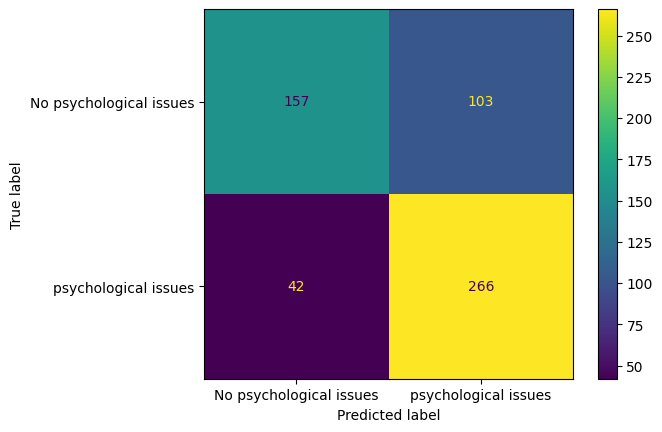

                         precision    recall  f1-score   support

No psychological issues       0.79      0.60      0.68       260
   psychological issues       0.72      0.86      0.79       308

               accuracy                           0.74       568
              macro avg       0.75      0.73      0.73       568
           weighted avg       0.75      0.74      0.74       568



In [200]:
#Model's Results 

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix,classification_report

cm = confusion_matrix(y_test, y_predicted_NVM, labels=nb_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb_model.classes_)
disp.plot()
plt.show() 

##View the classification report 
ML_NB_model_classification_report  = classification_report(y_test,y_predicted_NVM)
print(ML_NB_model_classification_report)

In [ ]:
###########################################################################################################################################################################################################################################

### Naive Bayes - Recall As A Metric 

In [201]:
#Finding the optimum hyperparamters when accuracy is the metric to Optimize
from sklearn.naive_bayes import BernoulliNB
nb_model = BernoulliNB()


from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')#  Will not show any of the warnings
parameters = {'alpha' : [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000], 'force_alpha': [True, False], 'fit_prior':[True, False]} #Theses paramters we tune

ML_NB_model_grid_model = RandomizedSearchCV(nb_model, param_distributions = parameters, scoring='recall', cv=10, n_jobs=-1)                     
ML_NB_model_grid_model.fit(tfidf_X_train,y_train ) #fitting the model to the X and y trained data

print("Tuned Hyperparameters :", ML_NB_model_grid_model.best_params_) 
print("recall :",ML_NB_model_grid_model.best_score_) 

Tuned Hyperparameters : {'force_alpha': False, 'fit_prior': False, 'alpha': 0.001}
recall : nan


- Even when Using RandomizedSearchCV the model seemed not to be able to converge when "recall" is the metric of choice this could be do to:
    - Data not being good to be used in this model 
    - There is not enough data to be used
- To solve the above issue a trial and error method will be used in which we will use various alpha paramters to hopefully decrease the False Negatives which means increasing the recall

In [202]:
#Model Building from the RandomizedSearchCV's results 

from sklearn.naive_bayes import BernoulliNB
nb_model = BernoulliNB(force_alpha = True, fit_prior = True , alpha = 3 )
nb_model.fit(tfidf_X_train,y_train ) #fitting the model to the X and y trained data
y_predicted_NVM = nb_model.predict(tfidf_X_test) #view the predicted results from the fitted model by predicting the X Test (X_validation)

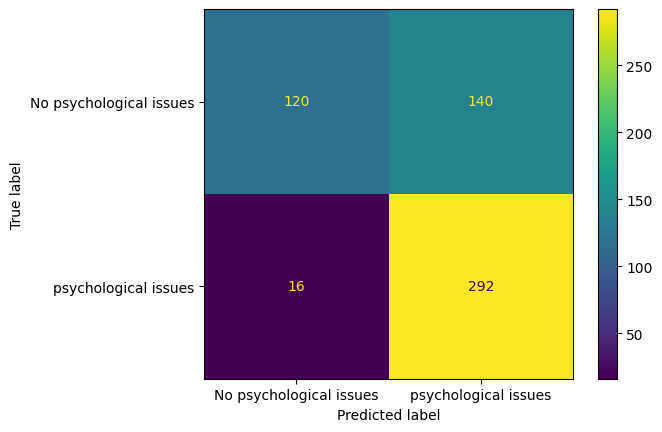

                         precision    recall  f1-score   support

No psychological issues       0.88      0.46      0.61       260
   psychological issues       0.68      0.95      0.79       308

               accuracy                           0.73       568
              macro avg       0.78      0.70      0.70       568
           weighted avg       0.77      0.73      0.71       568



In [203]:
#Model's Results 

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix,classification_report

cm = confusion_matrix(y_test, y_predicted_NVM, labels=nb_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb_model.classes_)
disp.plot()
plt.show() 

##View the classification report 
ML_model_classification_report  = classification_report(y_test,y_predicted_NVM)
print(ML_model_classification_report)

- Alpha the smoothing paramter is used to handle the problem when the probabilities reaches 0. 
- Increasing the smoothing parameter decreased the False Negatives. However, increasing alpha means that the overall distrubtion gets closer to being a uniform distrubtion (i.e., text data have the same probability of falling into the positive class as that of the negative class). Therefore, it is commonly recommended that we do not increase alpha beyond the value of 1 too much to avoid the data forming a uniform distrubtion 
- An alpha of 1 produced a false negative of 42 and false postive of 103
- An alpha of 2 produced a false negative of 25 and false postive of 123
- An alpha of 3 produced a false negative of 16 and false postive of 140
- An alpha of 4 produced a false negative of 12 and false postive of 160 
- An alpha of 5 produced a false negative of 6  and false postive of 179
- The selected alpha value was 3, because even though false postive  is not the model's main concern it is still a number we wish to keep it relatively low. When alpha is 3 in Bernoulli Naive Baye we have a flase positive similar to that of Multinomial Naive Bayes when its alpha value is equal to 1

--------------------------------------------------------------------------------------------